In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
 from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
x = iris.data
y = iris.target

In [7]:
df = pd.DataFrame(x, columns = ['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'])

In [8]:
df.head()     # 5행 출력

,sepal_width(cm),sepal_length(cm),petal_width(cm),petal_length(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# train data와 test data 나누기
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
# train data가 70%, test data가 30%

In [11]:
# 의사결정나무 임포트
from sklearn.tree import DecisionTreeClassifier

In [12]:
clf = DecisionTreeClassifier()      # 의사결정나무 생성

In [13]:
clf = clf.fit(x_train, y_train)     # 의사결정나무 훈련

In [14]:
y_pred = clf.predict(x_test)        # 테스트 데이터셋을 통해 예측

In [15]:
from sklearn import metrics

In [16]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))     # 모델의 정확도 출력

Accuracy:  0.9555555555555556


In [17]:
pip install graphviz

In [18]:
pip install pydotplus

In [19]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

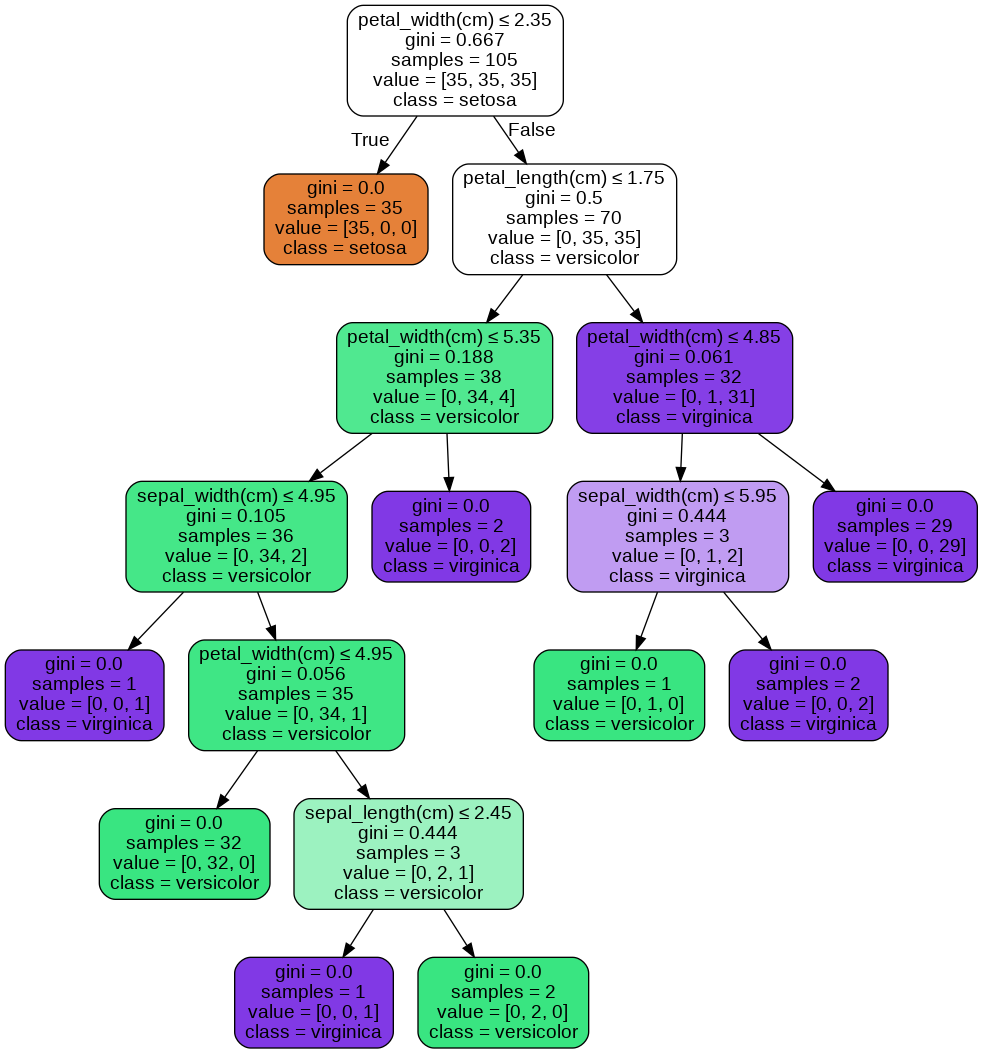

In [20]:
dot_data = export_graphviz(clf, out_file=None, feature_names=['sepal_width(cm)', 'sepal_length(cm)', 'petal_width(cm)', 'petal_length(cm)'],
                           class_names = iris.target_names, filled = True, rounded = True, special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())